# `Matplotlib` 資料視覺化

`matplotlib` 幾乎是標準 Python 畫圖套件了! 在有 `matplotlib` 之前, Python 要畫圖不那麼方便, 和 Python 很多套件一樣, 有許多方案, 但各家有不同的優缺點, 也沒有一套是大家都在用的。

而 `matplotlib` 仿 Matlab 式的畫圖方式, 讓很多人很快入手、並且功能相當完整。原作者是 John D. Hunter, 和很多 Python 的套件作者一樣, 他有博士學位。非常令人遺憾的是他在 2012 年因大腸直腸癌治療併發症過逝, 過逝時才 44 歲!


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## 1 畫個函數

前面說過 `plt.plot` 的基本用法是

    plt.plot(X,Y)

其中 X, Y 是分別是點 x 座標, y 座標形的的 list 或 array。

### 【重點】標準函數畫法

函數畫圖其實就是描點法, 而且再次用到陣列導向計算的概念。

我們先牛刀小試, 畫個 $\sin$ 的圖。

$$f(x) = \sin(x)$$

先來設個 x 的範圍, 就 -10 到 10, 給 100 個點。

In [2]:
x = np.linspace(-10, 10, 100)

y 自然是 $\sin(x)$。

In [3]:
y = np.sin(x)

畫圖!

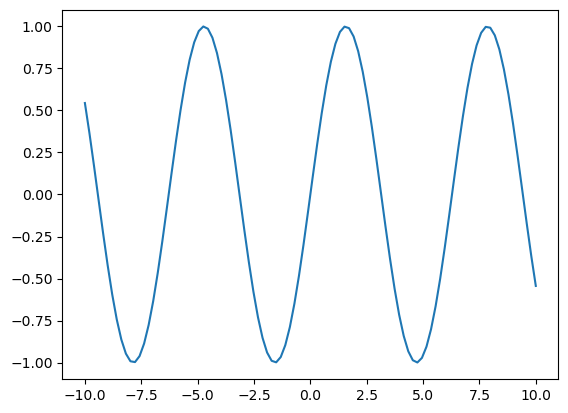

In [4]:
plt.plot(x, y)

### 【練習】函數畫圖

這次我們來畫:

$$f(x) = \frac{\sin(5x)}{1+x^2}$$

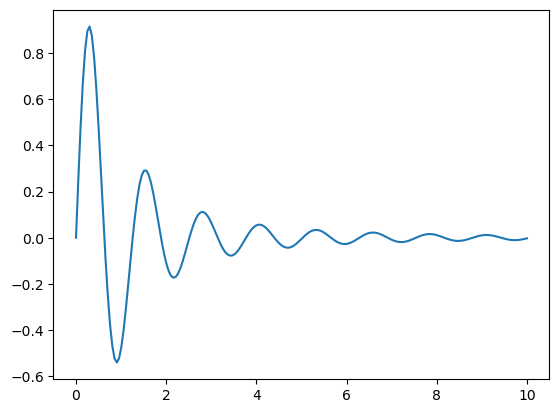

In [5]:
x = np.linspace(0, 10, 200)
y = np.sin(5 * x) / (1 + x ** 2)
plt.plot(x, y)

## 2 快速改變風格

雖然 `matplotlib` 在很辛苦的調校之後也是可以畫美美的圖, 不過它比較是「讓我們快速看到結果」的套件。所以它有些快速基本修飾功能。

### 【技巧】快速改變顏色

![快取色彩](images/color.png)

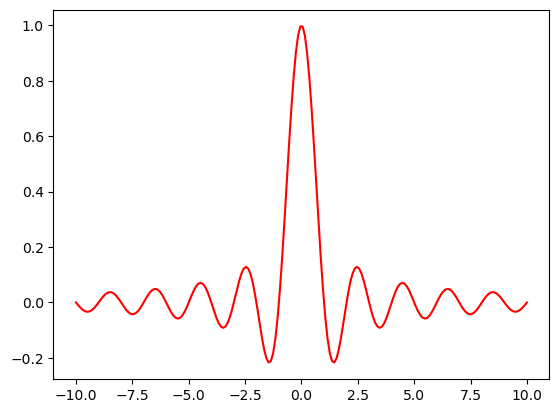

In [6]:
x = np.linspace(-10, 10, 200)
y = np.sinc(x)
plt.plot(x, y, 'r')

### 【技巧】快速改變線條風格

快速改變線條風格, 還可和顏色混用。

| 參數 | 說明 |
|---|---|
| `--` | dash |
| `-.` | 點 + dash |
| `:` | 點點 |
| `o` | 大點點 |
| `^` | 三角 |
| `s` | 方塊 |

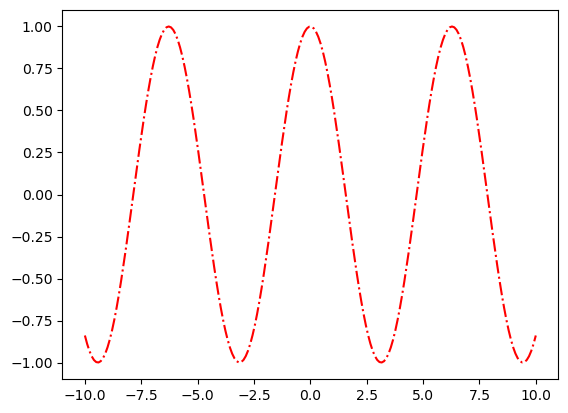

In [7]:
x = np.linspace(-10, 10, 200)
y = np.cos(x)
plt.plot(x, y, 'r-.')

## 3 基本的修飾

| 參數 | 說明 |
|---|---|
| `alpha` | 透明度 |
| `color` (`c`)| 顏色 |
| `linestyle` (`ls`) | 線條風格 |
| `linewidth` (`lw`) | 線寬 |

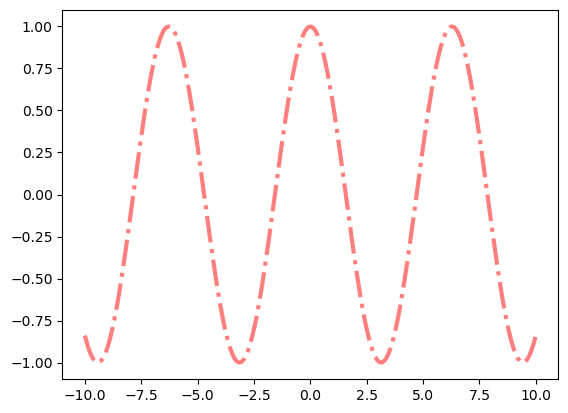

In [8]:
plt.plot(x, y, alpha=0.5, c='r', ls="-.", lw=3)

## 4 如果畫個參數式圖形

其實參數式圖形基本上也是一堆 x, y 的座標, 只是 x(t), y(t) 都是 t 的函數, 我們可以想成 t 是時間。

假設我們的

$$ -2\pi \leq t \leq 2\pi$$

要畫個半徑是 r 的圓, x(t), y(t) 就是這樣:

* $x(t) = r\cos(t)$
* $y(t) = r\sin(t)$

我們來試試事情是不是如我們想的這樣...

In [9]:
r = 3
t = np.linspace(-2 * np.pi, 2 * np.pi, 200)

In [10]:
x = r * np.cos(t)
y = r * np.sin(t)

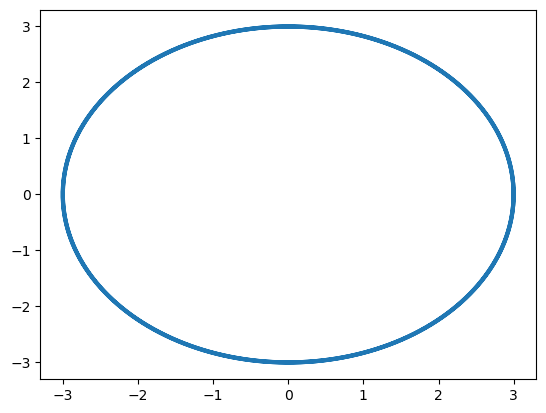

In [11]:
plt.plot(x, y, lw=3)

真的成功了... 等等, `matplotlib` 怎麼畫成橢圓呢? 我們來調整一下。

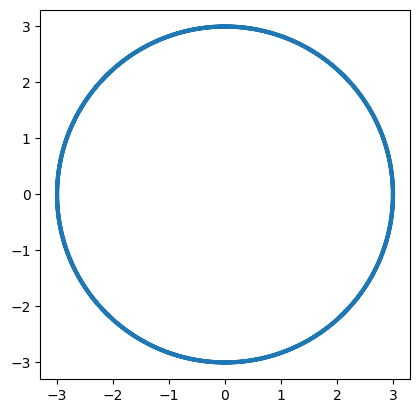

In [12]:
ax = plt.gca()
ax.set_aspect("equal")
plt.plot(x, y, lw=3)

再來我們可以想一下, 如果 r 不是故定的呢? 也就是它會變長變短, 是不是會畫出很多特別的圖呢? 其實很多特別的曲線不過就是找個試合的 r(t), 我們來隨意試試看。

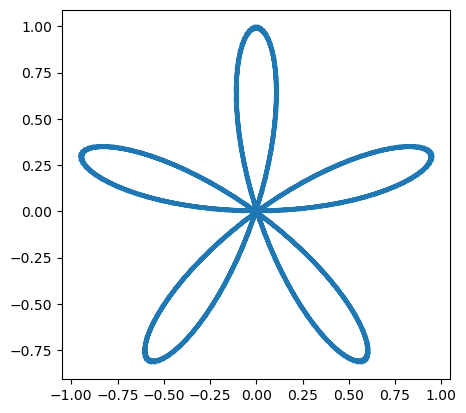

In [13]:
r = np.sin(5 * t)
x = r * np.cos(t)
y = r * np.sin(t)
ax = plt.gca()
ax.set_aspect("equal")
plt.plot(x, y, lw=3)

是不是很有意思呢? 你也可以自己試試不同的變化。

## 5 `subplot` 畫多個圖

我們每次畫圖的時候, `matplotlib` 就弄 1 個 figure 畫圖區出來, 裡面可以有很多子圖, 在 figure 裡叫 axes。目前我們都只有 1 個 figure 內含 1 張圖, 所以都不用設, 現在我想畫 4 張圖時。我們就要先想好「陣式」。

比如說 2x2 這樣排列的 4 張圖。

<BarContainer object of 10 artists>

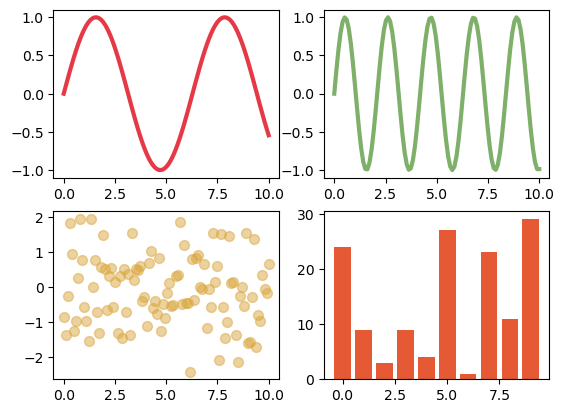

In [14]:
x = np.linspace(0, 10, 100)
plt.subplot(221) #分成2 x 2，佔用第1格
plt.plot(x, np.sin(x), c="#e63946", lw=3)

plt.subplot(222) #分成2 x 2，佔用第2格
plt.plot(x, np.sin(3*x), c="#7fb069", lw=3)

plt.subplot(223) #分成2 x 2，佔用第3格
plt.scatter(x, np.random.randn(100), c="#daa73e", s=50, alpha=0.5)

plt.subplot(224) #分成2 x 2，佔用第4格
plt.bar(range(10), np.random.randint(1, 30, 10), fc="#e55934")

## 6 進階色彩*

#### 顏色表示法 1

    c = 'r' 

可以用 blue (b), green (g), red (r), cyan (c), magenta (m), yellow (y), black (k), white (w)


#### 顏色表示法 2

用一個 0 到 1 的數字表灰階, 越大越白。

    c = '0.6'
    
#### 顏色表示法 3

網頁常用的標準 16 進位 RGB 表示法。

    c = '#00a676'
    
我們怎知哪裡可選顏色呢? 可以用之前彥良介紹的 [Coolors.co](https://coolors.co) 等。
    
#### 顏色表示法 4

用 0-1 的數字表 RGB 也可以。

    c=(0.7, 0.4, 1)

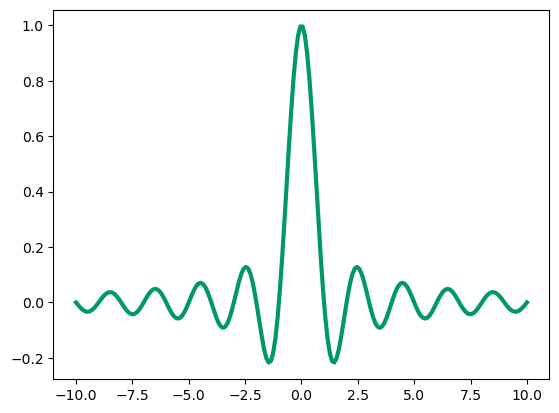

In [15]:
x = np.linspace(-10, 10, 200)
y = np.sinc(x)
plt.plot(x, y, c=(0, 0.6, 0.4), lw=3)

## 7 Marker*

所謂 'marker' 就是原來的點, 我們特別標示出來, 為了不要讓圖形太複雜, 我們新換個點比較少的例子。

In [16]:
x = range(20)
y = np.random.randn(20)

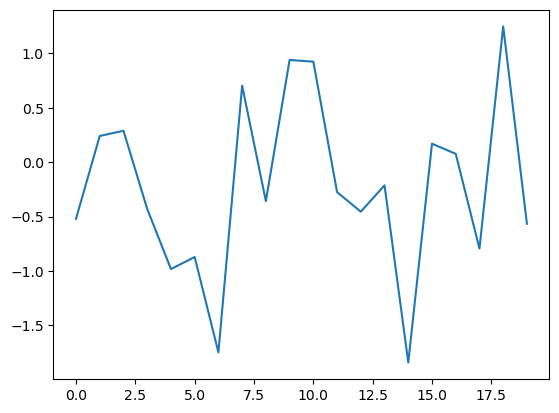

In [17]:
plt.plot(x, y)

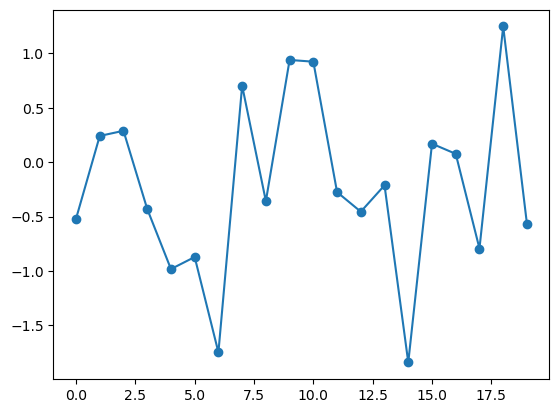

In [19]:
plt.plot(x, y, marker="o")

#### marker 可以設的參數

| 參數 | 說明 |
|---|---|
| `marker` | marker 的風格 |
| `markeredgecolor` (`mec`) | 邊線顏色 |
| `markeredgewidth` (`mew`) | 邊線寬度 |
| `markerfacecolor` (`mfc`) | marker 的顏色 |
| `markerfacecoloralt` (`mfcalt`) | marker 替換色 |
| `markersize` (`ms`) | marker 大小 |
| `markevery` | 隔多少畫一個 marker |

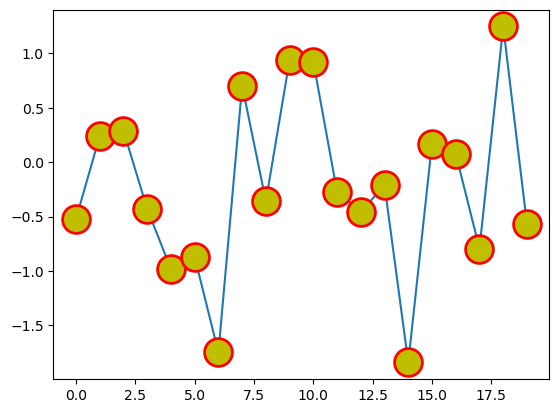

In [20]:
plt.plot(x, y, marker="o", mec="r", mfc="y", mfcalt="g", mew=2, ms=20, markevery=1)

比較奇特的參數是 `markevery`, 這是說我們每多少筆資料要畫一個 marker。為了示範, 我們拿之前的例子來看看。

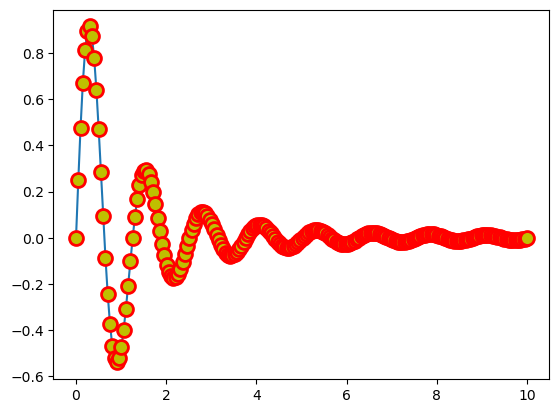

In [21]:
x = np.linspace(0, 10, 200)
y = np.sin(5 * x) / (1 + x ** 2)
plt.plot(x, y, marker="o", mec="r", mfc="y", mfcalt="g", mew=2, ms=10)

後面的完完全全連在一起了, 我們現在隔 10 個畫一個 marker 試試。

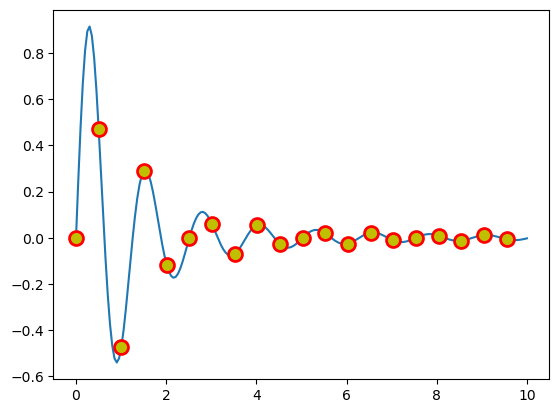

In [22]:
plt.plot(x, y, marker="o", mec="r", mfc="y", mfcalt="g", mew=2, ms=10, markevery=10)

## 8 bar 風*

<BarContainer object of 5 artists>

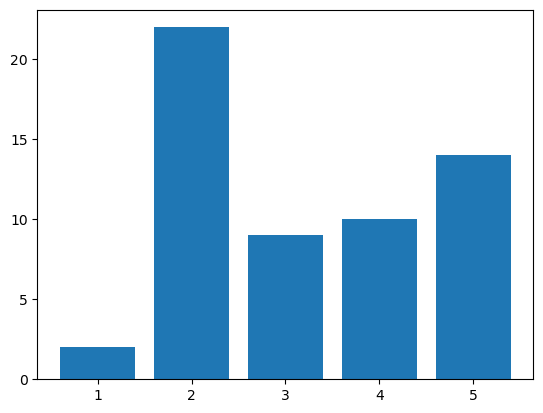

In [23]:
plt.bar(range(1, 6), np.random.randint(1, 30, 5))

移一點點。

<BarContainer object of 5 artists>

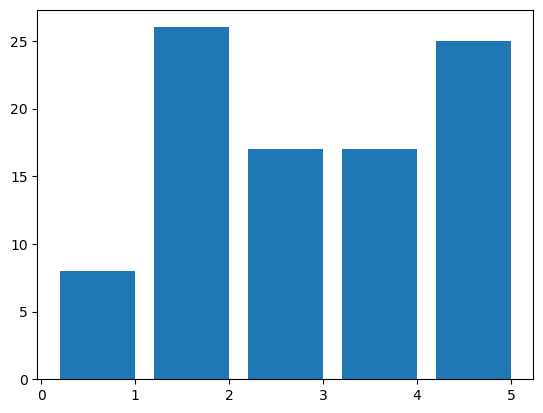

In [24]:
plt.bar(np.arange(0.6, 5), np.random.randint(1, 30, 5))

#### 雙色的長條圖

<BarContainer object of 5 artists>

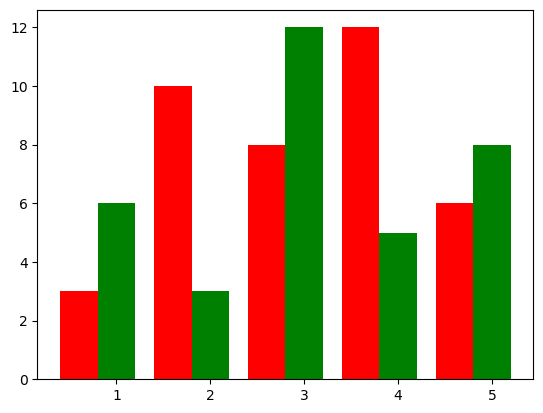

In [25]:
x = np.arange(1, 6)
plt.bar(x-0.4, [3, 10, 8, 12, 6], width=0.4, ec="none", fc="r")
plt.bar(x, [6, 3, 12, 5, 8], width=0.4, ec="none", fc="g")

#### 疊加型的資料

<BarContainer object of 5 artists>

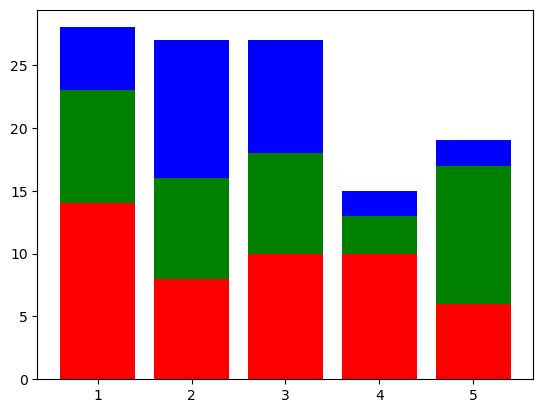

In [26]:
A = np.random.randint(2, 15, 5)
B = np.random.randint(2, 15, 5)
C = np.random.randint(2, 15, 5)

plt.bar(x, A, ec="none", fc="r")
plt.bar(x, B, ec="none", fc="g", bottom=A)
plt.bar(x, C, ec="none", fc="b", bottom=A+B)

#### 橫放的長條圖

<BarContainer object of 5 artists>

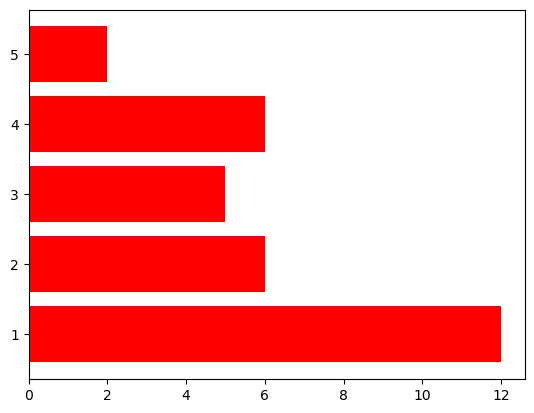

In [27]:
A = np.random.randint(2, 15, 5)
plt.barh(x, A, ec="none", fc="r")

#### 雙向的長條圖

<BarContainer object of 6 artists>

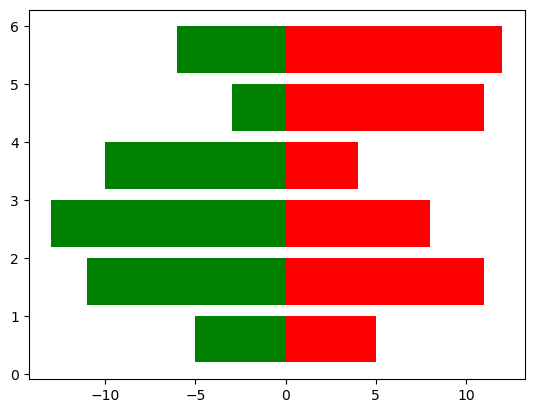

In [28]:
x = np.arange(0.6, 6)
A = np.random.randint(1, 15, 6)
B = np.random.randint(1, 15, 6)
plt.barh(x, A, ec="none", fc="r")
plt.barh(x, -B, ec="none", fc="g")

## 9 畫圖區的設定*

#### 說明文字的標示

In [3]:
x = np.linspace(-2*np.pi, 2*np.pi, 200)
y = np.sin(x)

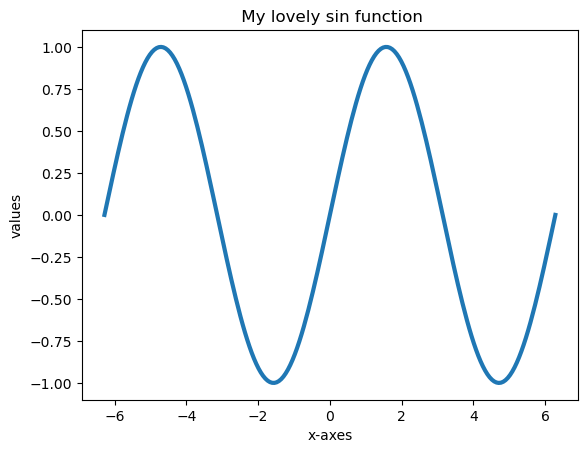

In [30]:
plt.title(" My lovely sin function")
plt.xlabel("x-axes")
plt.ylabel("values")
plt.plot(x, y, lw=3)

#### 邊界的設定

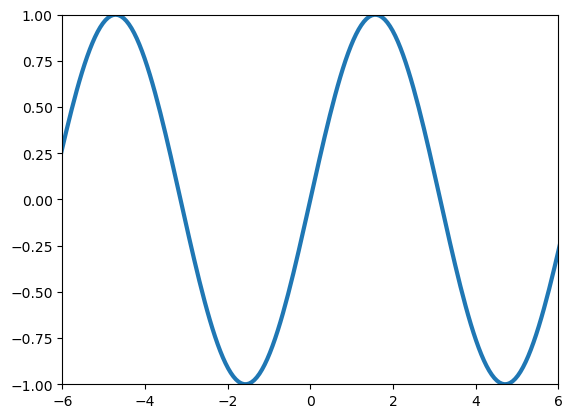

In [31]:
plt.xlim(-6, 6)
plt.ylim(-1, 1)
plt.plot(x, y, lw=3)

#### xticks

([<matplotlib.axis.XTick at 0x18003b92d90>,
 [Text(0.0, 0, '0'),
  Text(1.5707963267948966, 0, '$\\pi/2$'),
  Text(3.141592653589793, 0, '$\\pi$'),
  Text(4.71238898038469, 0, '$3*\\pi/2$'),
  Text(6.283185307179586, 0, '$-2\\pi$')])

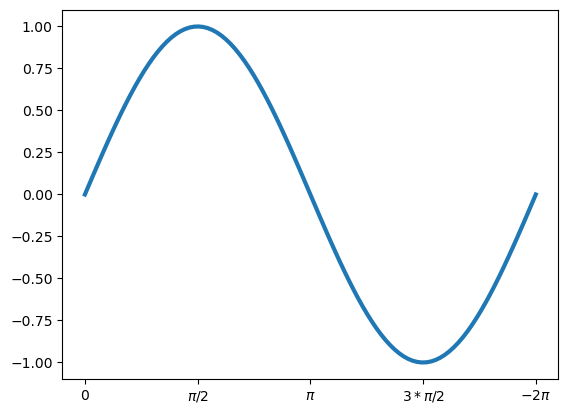

In [32]:
xv = np.linspace(0, 2*np.pi, 100)
yv = np.sin(xv)
plt.plot(xv, yv, lw=3)
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], ["0", "$\pi/2$", "$\pi$", "$3*\pi/2$", "$-2\pi$"])

# [練習]自己生成測試數據，X軸xticks對應到y軸數值

例如: 1,2,3,4,5 對應X軸 '甲','乙'...

([<matplotlib.axis.XTick at 0x180050d6640>,
 [Text(1, 0, '甲'),
  Text(2, 0, '乙'),
  Text(3, 0, '丙'),
  Text(4, 0, '丁'),
  Text(5, 0, '戊')])

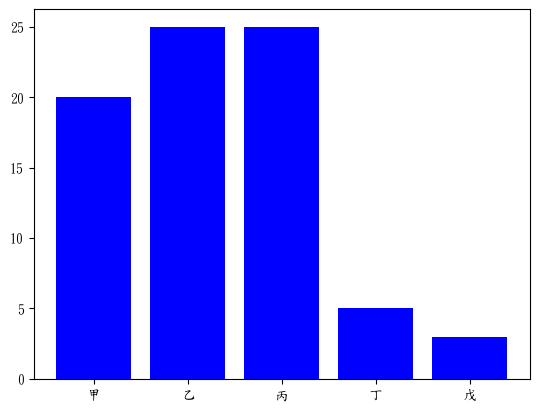

In [34]:
plt.rcParams['font.family']='DFKai-SB' #使用中文字體（黑體）
xx = range(1, 6)
yy = np.random.randint(1, 30, 5)
plt.bar(xx, yy, fc="b")
plt.xticks(np.arange(1, 6), ["甲", "乙", "丙", "丁", "戊"])

#### 圖例 legend

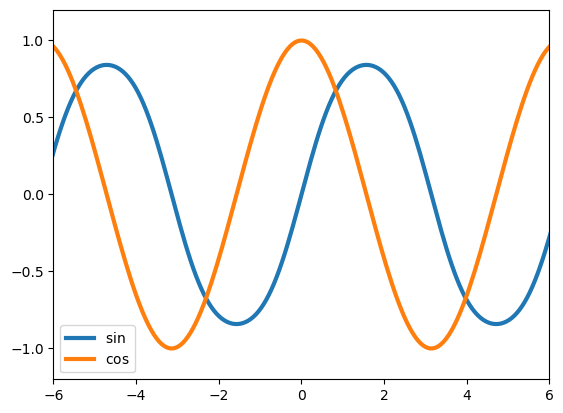

In [4]:
plt.xlim(-6, 6)
plt.ylim(-1.2, 1.2)
plt.plot(x, np.sin(y), lw=3, label="$\sin$")
plt.plot(x, np.cos(x), lw=3, label="$\cos$")
plt.legend()

可用 `loc` 去設圖例的位置, 依 1, 2, 3, ... 表示。
0:best
1:upper right
2:upper left
3:lower left
4:lower right
5:right
6:center left
7:center right
8:lower center
9:upper center
10:center

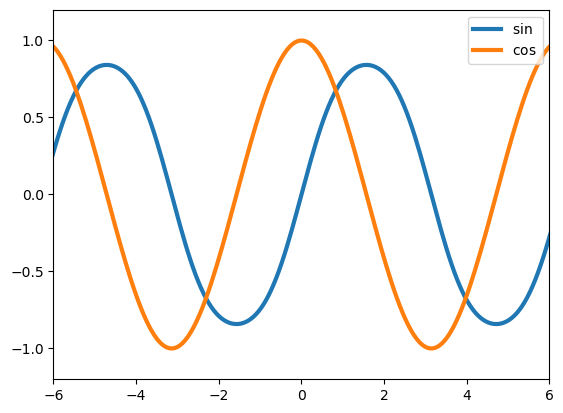

In [5]:
plt.xlim(-6, 6)
plt.ylim(-1.2, 1.2)
plt.plot(x, np.sin(y), lw=3, label="$\sin$")
plt.plot(x, np.cos(x), lw=3, label="$\cos$")
plt.legend(loc="upper right")

## 10 取得現在工作中 axes*

我們有時要設 axes 的背景啦等等的資訊。這時就要取得現在工作中的 axes。這一般有兩種方式, 第一種是設 `subplot` 時可以取得:

    fig, ax = plt.subplot()
    
另一種是用 `gca` 函數:

    ax = plt.gca()

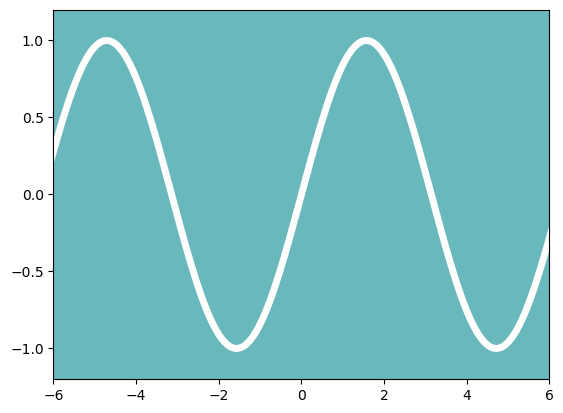

In [6]:
ax = plt.gca()
ax.set_facecolor("#69b8bb")
ax.set_xlim(-6, 6)
ax.set_ylim(-1.2, 1.2)
plt.plot(x, y, lw=5, c="#ffffff")

#### 移動 x, y 座標軸

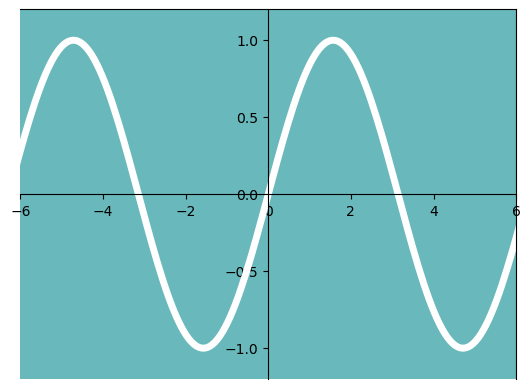

In [7]:
ax = plt.gca()
ax.set_facecolor("#69b8bb")
ax.set_xlim(-6, 6)
ax.set_ylim(-1.2, 1.2)

ax.spines["bottom"].set_position(("data", 0))
ax.spines["left"].set_position(("data", 0))
plt.plot(x, y, lw=5, c="#ffffff")

## 11 耍寶可愛的 `xkcd`*

In [8]:
plt.xkcd()

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

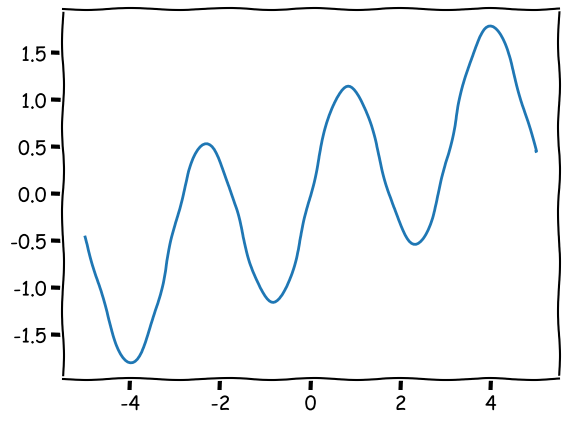

In [9]:
x = np.linspace(-5, 5, 200)
y = np.sin(2*x) + 0.2 * x
plt.plot(x, y)

## 12 `seaborn` 大救星

雖然 `matplotlib` 幾乎什麼都可以調, 但有些簡單的調整卻要花費很多時間。於是有了許多可以協助 `matplotlib` 變美、變方便的套件出現。最近有個很有名的叫 `seaborn`, 儼然有另一個標準套件的態式。

最重要的是 `seaborn` 和我們未來要介紹的 `pandas` 配合得非常好, 雖然熊貓和海生的聽來就沒什麼關係...

我們先來個標準 (又來標準縮寫) 讀入 `seaborn` 的方法。

In [14]:
import seaborn as sns

然後像平常畫個圖。

In [15]:
sns.set(color_codes=True)

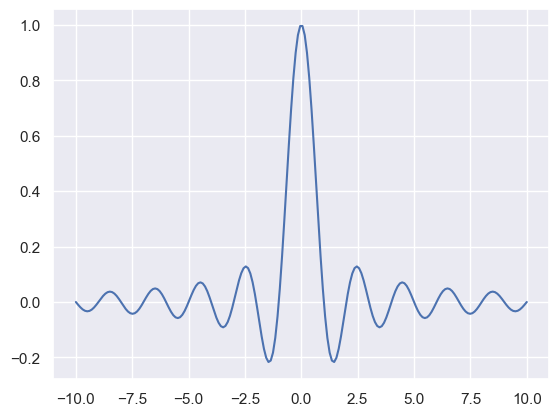

In [16]:
x = np.linspace(-10, 10, 200)
y = np.sinc(x)

plt.plot(x, y)

傑克, 這真是太神奇了!

總之, 你根本就直接用原來 `matplotlib` 的指令, 馬上 `seaborn` 就會幫你美化。當然我們還是可以做更多的控制, 詳情請參考

[seaborn 的網站](https://seaborn.github.io/)

In [13]:
plt.rcdefaults()